# 실제 데이터로 만들어 보는 모델

## 1. 데이터 파악하기

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

# 집 값 데이터를 불러옵니다.
df = pd.read_csv("./data/house_train.csv")

# 데이터를 미리 살펴보겠습니다.
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [4]:
# 데이터가 어떤 유형으로 이루어져 있는지 알아봅니다.
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## 2. 결측치, 카테고리 변수 처리하기

In [6]:
# 속성별로 결측치가 몇 개인지 확인합니다.
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [7]:
# 카테고리형 변수를 0과 1로 이루어진 변수로 바꾸어 줍니다.
df = pd.get_dummies(df)

# 결측치를 전체 칼럼의 평균으로 대체하여 채워줍니다.
df = df.fillna(df.mean())


# 업데이트된 데이터 프레임을 출력해봅니다.
df

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  \
0          2003          2003       196.0         706  ...           False   
1          1976          1976         0.0         978  ...           False   
2          2001          2002       162.0         486  ...           False   
3          1915          1970         0.0         216  ...           False   
4          2000          2000       350.0         655  ...           False   
...         ...           ...         ...         ...  ...             ...   
1455       1999          2000         0.0           0  ...           False   
1456       1978          1988       119.0         790  ...           False   
1457       1941          2006         0.0         275  ...           False   
1458       1950          1996         0.0          49  ...           False   
1459       1965          1965         0.0         830  ...           False   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0            False         False         True                  False   
1            False         False         True                  False   
2            False         False         True                  False   
3            False         False         True                   True   
4            False         False         True                  False   
...            ...           ...          ...                    ...   
1455         False         False         True                  False   
1456         False         False         True                  False   
1457         False         False         True                  False   
1458         False         False         True                  False   
1459         False         False         True                  False   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                     False                 False                 False   
1                     False                 False                 False   
2                     False                 False                 False   
3                     False                 False                 False   
4                     False                 False                 False   
...                     ...                   ...                   ...   
1455                  False                 False                 False   
1456                  False                 False                 False   
1457                  False                 False                 False   
1458                  False                 False                 False   
1459                  False                 False                 False   

      SaleCondition_Normal  SaleCondition_Partial  
0                     True                  False  
1                     True                  False  
2                     True                  False  
3                    False                  False  
4                     True                  False  
...                    ...                    ...  
1455                  True                  False  


## 3. 속성별 관련도 추출하기

In [9]:
# 데이터 사이의 상관 관계를 저장합니다.
df_corr=df.corr()

# 집 값과 관련이 큰 것부터 순서대로 저장합니다.
df_corr_sort=df_corr.sort_values('SalePrice', ascending=False)


# 집 값과 관련도가 가장 큰 10개의 속성들을 출력합니다.
df_corr_sort['SalePrice'].head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

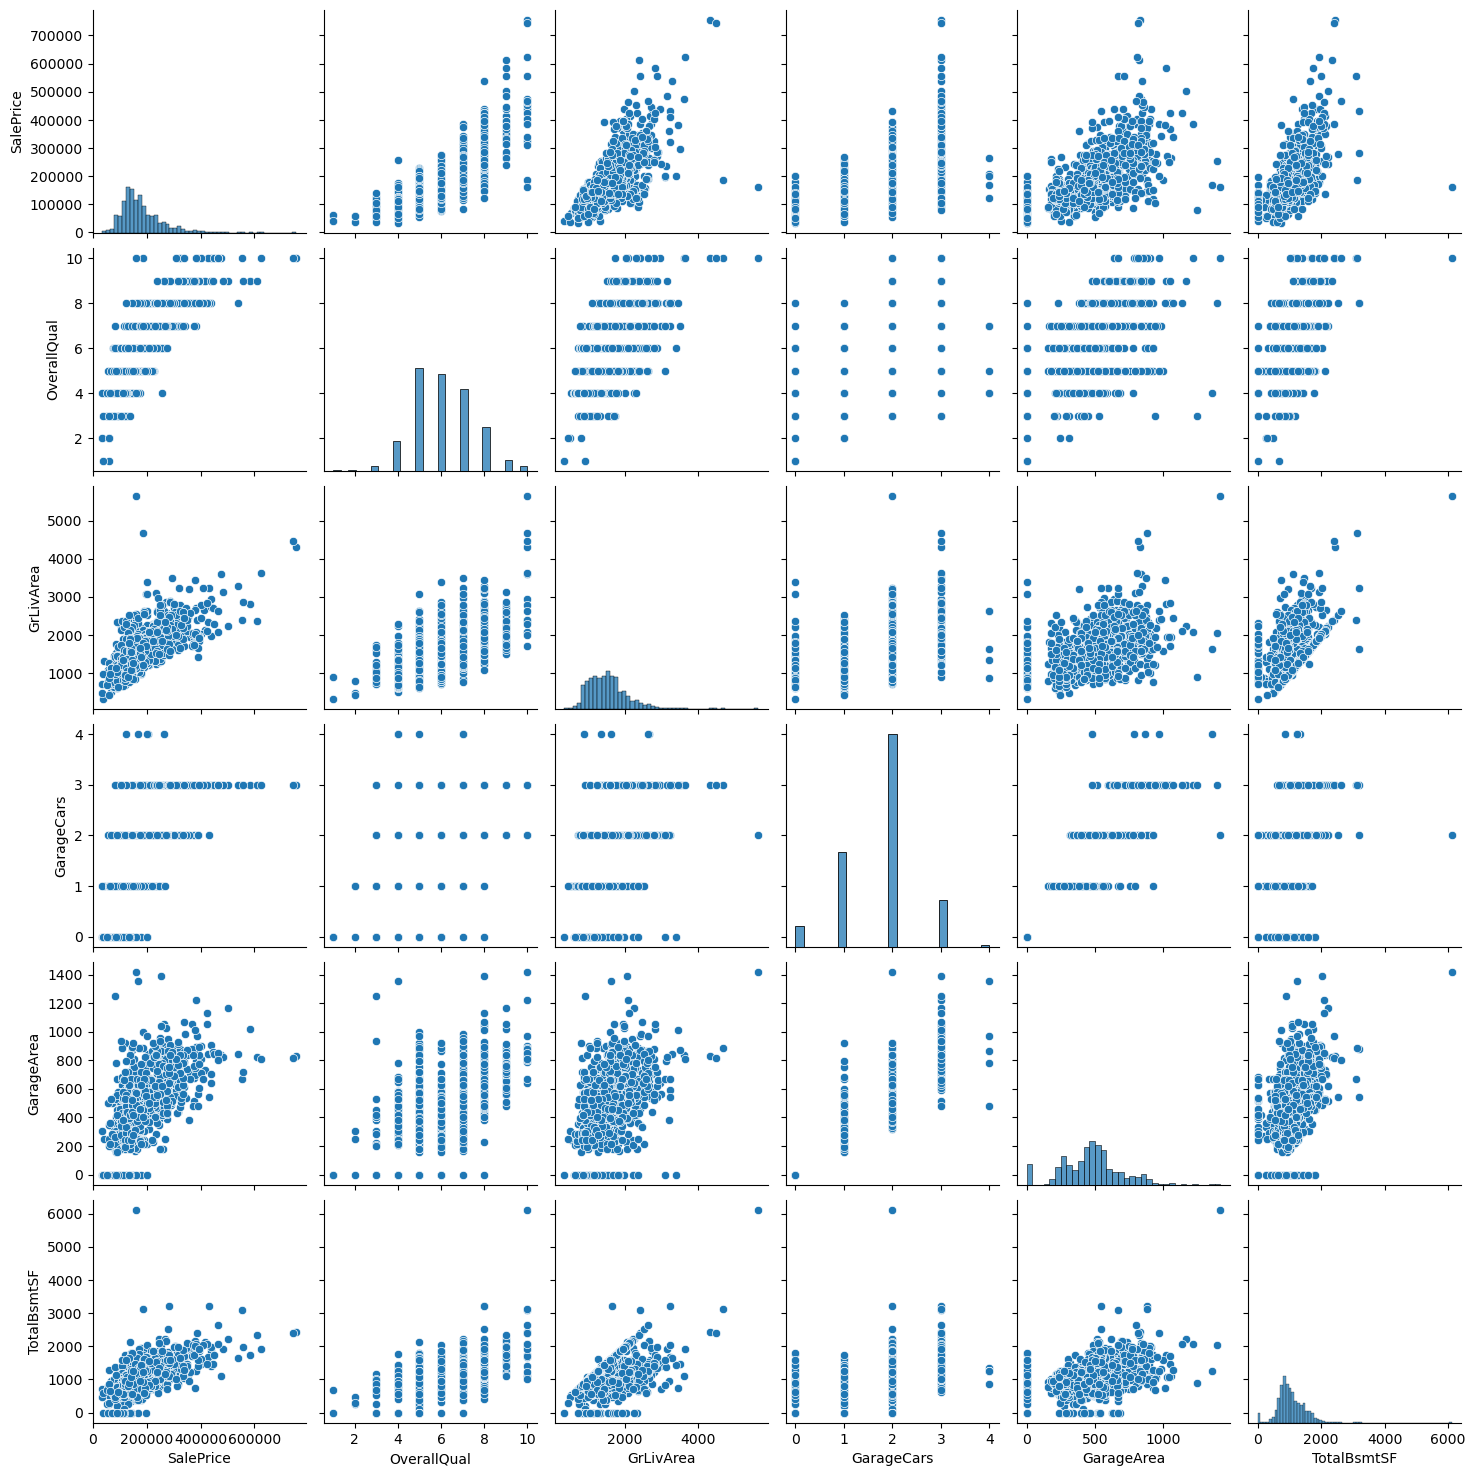

In [10]:
# 집 값과 관련도가 가장 높은 속성들을 추출해서 상관도 그래프를 그려봅니다.
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
sns.pairplot(df[cols])
plt.show();

## 4. 주택 가격 예측 모델

In [12]:
# 집 값을 제외한 나머지 열을 저장합니다.
cols_train=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
X_train_pre = df[cols_train]

# 집 값을 저장합니다.
y = df['SalePrice'].values

In [13]:
# 전체의 80%를 학습셋으로, 20%를 테스트셋으로 지정합니다.
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y,
                                                    test_size=0.2)

In [14]:
X_train

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF
1026            5       1264           2         461         1268
1144            4        924           1         280          672
815             7       1661           2         598         1649
1422            6        848           2         420          848
844             5       1416           3         720          876
...           ...        ...         ...         ...          ...
999             7       1208           2         632         1187
199             8       1713           3         856         1713
273             6       1632           1         338         1240
945             5       1869           2         456         1088
921             5       2200           0           0         1272

[1168 rows x 5 columns]

In [15]:
X_train.shape[1]

5

In [16]:
X_train.shape[0]

1168

In [17]:
# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

# 모델을 실행합니다.
model.compile(optimizer ='adam', loss = 'mean_squared_error')

# 20회 이상 결과가 향상되지 않으면 자동으로 중단되게끔 합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 모델의 이름을 정합니다.
modelpath="./data/model/house.keras"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0,
                               save_best_only=True)

# 실행 관련 설정을 하는 부분입니다. 전체의 20%를 검증셋으로 설정합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, batch_size=32,
                    callbacks=[early_stopping_callback, checkpointer])

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 40)                  │           1,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,671 (6.53 KB)

 Trainable params: 1,671 (6.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 40621993984.0000 - val_loss: 43452116992.0000
Epoch 2/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40898375680.0000 - val_loss: 43243679744.0000
Epoch 3/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40762560512.0000 - val_loss: 42638688256.0000
Epoch 4/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36262166528.0000 - val_loss: 40827453440.0000
Epoch 5/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36694118400.0000 - val_loss: 36163764224.0000
Epoch 6/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30310084608.0000 - val_loss: 25992732672.0000
Epoch 7/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19231047680.0000 - val_loss: 11992303616.0000
Epoch 8/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7531496448.0000 - val_loss: 3789261568.0000
Epoch 9/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2376219136.0000 - val_loss: 3004286976.0000
Epoch 10/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

In [18]:
X_test

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF
963             9       1800           2         702         1800
728             5       1776           3         888         1584
97              4        960           1         432          960
723             4       1470           1         548          941
1050            7       1302           2         436         1302
...           ...        ...         ...         ...          ...
1383            5       1416           2         576          816
842             6       1165           2         490         1127
623             6       1512           2         440          756
437             6        904           1         180          884
225             5       1302           1         280          630

[292 rows x 5 columns]

In [19]:
model.predict(X_test)[:10]

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[254187.75 ],
       [259782.08 ],
       [140721.67 ],
       [180050.89 ],
       [177303.42 ],
       [174777.28 ],
       [141315.27 ],
       [208332.28 ],
       [116845.664],
       [105475.43 ]], dtype=float32)

In [20]:
model.predict(X_test).flatten()[:10]

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([254187.75 , 259782.08 , 140721.67 , 180050.89 , 177303.42 ,
       174777.28 , 141315.27 , 208332.28 , 116845.664, 105475.43 ],
      dtype=float32)

In [21]:
# 예측 값과 실제 값, 실행 번호가 들어갈 빈 리스트를 만듭니다.
real_prices =[]
pred_prices = []
X_num = []

# 25개의 샘플을 뽑아 실제 값, 예측 값을 출력해 봅니다.
n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
실제가격: 239000.00, 예상가격: 254187.75
실제가격: 110000.00, 예상가격: 259782.08
실제가격: 94750.00, 예상가격: 140721.67
실제가격: 135000.00, 예상가격: 180050.89
실제가격: 176485.00, 예상가격: 177303.42
실제가격: 127000.00, 예상가격: 174777.28
실제가격: 125000.00, 예상가격: 141315.27
실제가격: 185000.00, 예상가격: 208332.28
실제가격: 109000.00, 예상가격: 116845.66
실제가격: 85400.00, 예상가격: 105475.43
실제가격: 148000.00, 예상가격: 148429.34
실제가격: 114500.00, 예상가격: 121177.91
실제가격: 137500.00, 예상가격: 166152.58
실제가격: 214000.00, 예상가격: 209428.23
실제가격: 220000.00, 예상가격: 210849.05
실제가격: 165600.00, 예상가격: 159605.22
실제가격: 133000.00, 예상가격: 118326.48
실제가격: 267000.00, 예상가격: 254552.92
실제가격: 140000.00, 예상가격: 155204.23
실제가격: 150750.00, 예상가격: 185255.33
실제가격: 155000.00, 예상가격: 183647.23
실제가격: 228000.00, 예상가격: 236091.47
실제가격: 169500.00, 예상가격: 175981.66
실제가격: 155000.00, 예상가격: 154529.52
실제가격: 93500.00, 예상가격: 99036.65


In [22]:
# 그래프를 통해 샘플로 뽑은 25개의 값을 비교해 봅니다.

plt.plot(X_num, pred_prices, label='predicted price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()